# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Identificação e Extração de Texto</span>
    
## <span style="color:blue">Avaliação</span>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios a seguir farão uso do aquivo <font style="font-family: monaco"> nfe-avaliacao.pdf</font>, disponíveis para download no Moodle.

### Exercício 1)
Considere a nota fiscal eletrônica representada no arquivo <font style="font-family: monaco"> nfe-avaliacao.pdf</font>. Converta o arquivo PDF em uma imagem no formato PNG. Utilize o pacote <font color='blue'>PIL</font> para carregar a imagem gerada. Qual a resolução da imagem gerada?

a) 1653 X 2339 <br>
b) 1024 X 640 <br>
c) 640 X 2339<br>
d) 1001 X 2020


**Dica**: Utilize o atribute `size` do objeto PIL para obter as dimensões da imagem e empregue os parâmetros default do método <font color='blue'>convert_from_path</font> para gerar a imagem.


In [1]:
from pdf2image import convert_from_path 
from PIL import Image
imagem_paginas = convert_from_path('nfe-avaliacao.pdf') 

In [4]:
for i,pagina in enumerate(imagem_paginas): 
    # PDF pagina 1 -> pagina_1.png  
    # PDF pagina 2 -> pagina_2.png  
    # .... 
    filename = "pagina_"+str(i)+".png"
      
    # Salavando a imagen da página em um arquivo
    print('Gravando pagina: ',filename)
    pagina.save(filename, 'PNG') 

Gravando pagina:  pagina_0.png


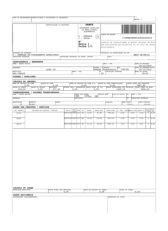

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
image = Image.open('pagina_0.png')
plt.axis('off')
plt.imshow(image)
plt.show()


In [11]:
image.size

(1653, 2339)

### Exercício 2)
Aplique OCR para extrair o texto contido na imagem gerada no exercício 1). Quantas linhas o texto resultante possui?

a) Menos de 100 linhas<br>
b) Entre 101 e 150 linhas<br>
c) Entre 151 e 200 linhas<br>
d) Mais de 201 linhas<br>

**Dica**: Para contar as linhas, procure pelo número de ocorrências do símbolo '\n' no texto extraído.

In [14]:
import pytesseract as ocr
texto = ocr.image_to_string(image, lang='por')


In [27]:
import re
import numpy as np
a=re.findall('\n',texto)
np.shape(a)

(267,)

### Exercício 3)
Escreva uma expressão regular para encontrar todos os valores financeiros descritos na nota. Ou seja, todos as ocorrências de uma sequência de dígitos que precedem uma vírgula, a qual é seguida de exatamente outros dois dígitos (por exemplo: 7545,43). Quantas ocorrências de valores financeiros existem na NEF?


a) Menos de 20 <br>
b) Entre 21 e 29<br>
c) Entre 30 e 40<br>
d) Mais de 41

In [39]:
import re
# encontrando uma sequência de dois dígitos seguidos por vírgula
b=re.findall('\d+,\d\d',texto)
print(b)
print('\n quantidade de valores financeiros:{}'.format(len(b)))

['0,00', '0,00', '0,00', '0,00', '5687,62', '250,00', '0,00', '337,62', '0,00', '0,00', '1425,19', '5600,00', '1358,61', '1345,00', '8,58', '67,90', '582,58', '0,00', '0,00', '0,00', '0,00', '16,66', '134,90', '2247,43', '0,00', '0,00', '0,00', '0,00', '51,12', '55,90', '2857,61', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00']

 quantidade de valores financeiros:38


### Exercício 4)
Dos valores financeiros obtidos no exercício anterior, os de valor maior que R$ 100,00 somam:

a) Menos de 10000,00<br>
b) Entre 10000,01 e 20000,00<br>
c) Entre 20000,01 e 30000,00<br>
d) Mais de 30000,01

**Dica**: Converta as strings para float.

In [62]:
import pandas as pd
df=pd.DataFrame(b,columns=['valores'])
df['valores']=df['valores'].apply(lambda x: x.replace(',','.')).astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   valores  38 non-null     float64
dtypes: float64(1)
memory usage: 432.0 bytes


In [66]:
print(df[df['valores']>100].sum())

valores    21826.56
dtype: float64


### Exercício 5)
Encontre todas as ocorrências da palavra "VALOR" onde o OCR reconheceu o caractere "V" de forma errada. Por exemplo, existem ocorrências onde o caractere "V" foi trocado pelo símbolo " ' ". Quantas ocorrências foram encontrada?

a) Menos de 10 <br>
b) Entre 11 e 20<br>
c) Entre 21 e 30<br>
d) Mais de 31

**Dica**: utilize o símbolo '^' combinado com '[ ]'. Veja documentação [aqui](https://docs.python.org/3/library/re.html).

In [82]:
re.findall('V*ALOR',texto)

['ALOR',
 'VALOR',
 'ALOR',
 'VALOR',
 'ALOR',
 'VALOR',
 'ALOR',
 'ALOR',
 'VALOR',
 'VALOR',
 'ALOR',
 'VALOR',
 'ALOR']

In [79]:
re.findall('[^V]ALOR',texto)

["'ALOR", "'ALOR", "'ALOR", '3ALOR', "'ALOR", 'gALOR', "'ALOR"]